# Case Study 2 - How Can a Wellness Technology Company Play It Smart?

## 1. Ask

● What is the problem you are trying to solve?
● How can your insights drive business decisions?

1. Identify the business task
2. Consider key stakeholders

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### 1.1 Background

Bellabeat is a high-tech manufacturer of health-focused products for women, aiming to become a larger player in the global smart device market.

Key Stakeholders are Urška Sršen, Bellabeat’s cofounder and Chief Creative Officer ,Sando Mur, Mathematician and Bellabeat’s cofounder and Bellabeat marketing analytics team.

Key focus is on one of Bellabeat's products and to analyze smart device data to gain insight into how consumers are using their smart devices. Help create a new marketing strategy using this analysis.

### 1.2 Task

Identify opportunities for improvement in both user experience and device implementation to accelerate growth of userbase. 

## 2. Prepare

● Where is your data located?
● How is the data organized?
● Are there issues with bias or credibility in this data? Does your data ROCCC?
● How are you addressing licensing, privacy, security, and accessibility?
● How did you verify the data’s integrity?
● How does it help you answer your question?
● Are there any problems with the data?

1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.

### 2.1 Data Organisation

Usage data is obtained through kaggle.com, where the dataset has been made available by kaggle user Mobius through the CCO: public domain license. The data will be stored on the local storage of the analyst. The data has been stored by as per downloaded. The analyst will import the data into jupyter notebook to be sorted and cleaned for analysis. 

### 2.2 Data Credibility

The data is obtained by user consent through the FitBit Fitness Tracker. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Although the datapoints are comprehensive, the data set which only comprises of 30 users is very limiting. An ROCCC analysis is completed below:

* Reliability: The data is obtained by user consent through the FitBit Fitness Tracker. This will be considered as first hand data and can be considered as reliable. 

* Originality: This data set is original as it is collected first-hand from active users.

* Comprehensiveness: The data set only comprises of 30 users worth of data. Although each data point is comprehensive, this data set will be considered as biased towards users with an active lifestyle who already owns a fitness tracking device. 

* Current: The data set is not current. The data collection was performed between 03.12.2016-05.12.2016. As this analysis is being performed in 2021, it is considered to be outdated.

* Cited: The dataset is downloaded through kaggle.com. 

From the above analysis, the data set is flawed in terms of comprehensiveness, currentness and biased towards a segment of the female population. The data set can only be used for analysis towards how the current user is using the product, and how the company can improve on the products to improve customer experience.

New datasets are required that will observe the behaviour and needs of the general female population in order to create marketing strategies to target new customer base.

In [1]:
# Import packages
import pandas as pd
import numpy as np

In [2]:
# Load data into dataframes
## Sleep information
sleep_day = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

## Daily Information
daily_activity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

In [3]:
# Investigate dataframe structure
daily_activity.info()
daily_calories.info()
daily_intensities.info()
daily_steps.info()
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
# Rename date and steps column for consistency
daily_activity = daily_activity.rename(columns = {'ActivityDate':'ActivityDay', 'TotalSteps':'StepTotal'})

In [21]:
# Convert all dataframe dates into datetime object
daily_activity.ActivityDay = pd.to_datetime(daily_activity.ActivityDay)
daily_calories.ActivityDay = pd.to_datetime(daily_calories.ActivityDay)
daily_intensities.ActivityDay = pd.to_datetime(daily_intensities.ActivityDay)
daily_steps.ActivityDay = pd.to_datetime(daily_steps.ActivityDay)
sleep_day.SleepDay = pd.to_datetime(sleep_day.SleepDay)

In [22]:
# Merge all daily activities into single dataframe for ease of use
cols_to_use = daily_calories.columns.difference(daily_activity.columns)
df_daily = pd.merge(daily_activity, daily_calories[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = daily_steps.columns.difference(df_daily.columns)
df_daily = pd.merge(df_daily, daily_steps[cols_to_use], left_index=True, right_index=True, how='outer')

cols_to_use = daily_intensities.columns.difference(df_daily.columns)
df_daily = pd.merge(df_daily, daily_intensities[cols_to_use], left_index=True, right_index=True, how='outer')

df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDay               940 non-null    datetime64[ns]
 2   StepTotal                 940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

## 3. Process

● What tools are you choosing and why?
● Have you ensured your data’s integrity?
● What steps have you taken to ensure that your data is clean?
● How can you verify that your data is clean and ready to analyze?
● Have you documented your cleaning process so you can review and share those results?

1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.

In [23]:
# Create new df_1 dataframe for data cleaning for both daily and sleep activities
df1_d = df_daily.copy()
df1_s = sleep_day.copy()

In [24]:
print('=====================================================')
print('Check for missing values')
print('=====================================================')
print(f'Missing values in daily activities:')
print(df1_d.isna().sum())
print('')
print(f'Missing values in daily activities:')
print(df1_s.isna().sum())
print('')
print('=====================================================')
print('Check for unique users')
print('=====================================================')
print(f'There is {len(df1_d.Id.unique())} unique Id in the daily activities dataframe')
print(f'There is {len(df1_s.Id.unique())} unique Id in the sleep dataframe')
print('')
print('=====================================================')
print('Check for duplicate data')
print('=====================================================')
print(f'There is {df1_d.duplicated().sum()} duplicate data in the daily activities dataframe')
print(f'There is {df1_s.duplicated().sum()} duplicate data in the sleep dataframe')

Check for missing values
Missing values in daily activities:
Id                          0
ActivityDay                 0
StepTotal                   0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Missing values in daily activities:
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Check for unique users
There is 33 unique Id in the daily activities dataframe
There is 24 unique Id in the sleep dataframe

Check for duplicate data
There is 0 duplicate data in the daily activities dataframe
There is 3 duplicate data in the sleep dataframe


There is no observed missing values from the dataframes, but there are duplicate data in the sleep dataframe. We also observed that there are 33 unique IDs in the daily activities dataframe but only 24 IDs in the sleep dataframe. 

There was 3 additional user information included into the daily dataframe but only 24 users provided sleep information. 

The reduced user data in the sleep database could be attributed to user's device not having a sleep tracking function as some lower tier devices tended not to include sleep tracking functions. 

In [25]:
# Create new data frame for sleep_day, dropping the duplicate rows
df2_s = df1_s.copy()

df2_s.drop_duplicates(keep='first', inplace=True)

In [26]:
print('=====================================================')
print('Check for duplicate data')
print('=====================================================')
print(f'There is {df1_d.duplicated().sum()} duplicate data in the daily activities dataframe')
print(f'There is {df2_s.duplicated().sum()} duplicate data in the sleep dataframe')

Check for duplicate data
There is 0 duplicate data in the daily activities dataframe
There is 0 duplicate data in the sleep dataframe


## 4. Analyze

● How should you organize your data to perform analysis on it?
● Has your data been properly formatted?
● What surprises did you discover in the data?
● What trends or relationships did you find in the data?
● How will these insights help answer your business questions?

1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

### 4.1 Initial observations

From the data above, we observed the following:
* The average total distance tracked is about 5.5kms.
* The daily average energy expenditure by users was 2.3kcal.
* We also note that some users also included data when the device was not used (ie. removed from their wrist) as seen in the when checking the min value data point for sedentary minutes. 
* The total minutes asleep of users were 419 minutes, which is equivalent to approximately 7 hours. 

In [27]:
df1_d.describe()

,Id,StepTotal,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [28]:
df1_d.iloc[df1_d['SedentaryMinutes'].idxmin(), :]

Id                                   4319703577
ActivityDay                 2016-05-12 00:00:00
StepTotal                                    17
TotalDistance                              0.01
TrackerDistance                            0.01
LoggedActivitiesDistance                    0.0
VeryActiveDistance                          0.0
ModeratelyActiveDistance                    0.0
LightActiveDistance                        0.01
SedentaryActiveDistance                     0.0
VeryActiveMinutes                             0
FairlyActiveMinutes                           0
LightlyActiveMinutes                          2
SedentaryMinutes                              0
Calories                                    257
Name: 411, dtype: object

In [29]:
df2_s.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927
std,2.060863e+09,0.346636,118.635918,127.455140
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.750000
50%,4.702922e+09,1.000000,432.500000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


### 4.2 Feature engineering
We added several features to help identify trends in users tracker usage. The features are listed below:
* Daily Dataframe
    * Added 'day of week' for datapoint
    * Added 'Active Tracking' for users who actively track workouts
    * Added 'Active' for users who achieved a minimum of 2000cal spent
    * Added 'RestRatio' and 'ActiveRatio' to observe the time the user was active
* Sleep Dataframe
    * Added 'day of week' for datapoint

In [30]:
df2_d = df1_d.copy()

df2_d['day_of_week'] = df2_d['ActivityDay'].dt.day_name()
# df2_d['highstepcount'] = df2_d['StepTotal'].apply(lambda x: True if x > 200 else False)
df2_d['ActiveTracking'] = df2_d['LoggedActivitiesDistance'].apply(lambda x: True if x > 0 else False)
df2_d['Active'] = df2_d['Calories'].apply(lambda x: True if x > 2000 else False)
df2_d['RestRatio'] = df2_d['SedentaryMinutes'] / (df2_d['LightlyActiveMinutes'] + df2_d['VeryActiveMinutes']+ df2_d['FairlyActiveMinutes']+ df2_d['SedentaryMinutes'])
df2_d['ActiveRatio'] = 1 - df2_d['RestRatio']

df2_d.head()

,Id,ActivityDay,StepTotal,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week,ActiveTracking,Active,RestRatio,ActiveRatio
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,False,False,0.665448,0.334552
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,False,False,0.751210,0.248790
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,False,False,0.845833,0.154167
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,False,False,0.727455,0.272545
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,False,False,0.743269,0.256731


In [31]:
df2_s['day_of_week'] = df2_s['SleepDay'].dt.day_name()
df2_s.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [32]:
# Merge sleep dataframe with daily activity dataframe based on users and dates.
df3_s = df2_s.copy()

df3_s = df3_s.merge(df1_d, left_on=['Id', 'SleepDay'], right_on=['Id','ActivityDay'])
df3_s.drop(columns=['ActivityDay'], inplace = True)
# df3_s['Activeminutes'] = df3_s['VeryActiveMinutes'] + df3_s['FairlyActiveMinutes'] + df3_s['LightlyActiveMinutes']
df3_s['Restratio'] = df3_s['SedentaryMinutes'] / (df3_s['LightlyActiveMinutes'] + df3_s['VeryActiveMinutes']+ df3_s['FairlyActiveMinutes']+ df3_s['SedentaryMinutes'])
df3_s['Activeratio'] = 1 - df3_s['Restratio']

df3_s.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week,StepTotal,TotalDistance,TrackerDistance,LoggedActivitiesDistance,...,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Restratio,Activeratio
0,1503960366,2016-04-12,1,327,346,Tuesday,13162,8.50,8.50,0.0,...,0.55,6.06,0.0,25,13,328,728,1985,0.665448,0.334552
1,1503960366,2016-04-13,2,384,407,Wednesday,10735,6.97,6.97,0.0,...,0.69,4.71,0.0,21,19,217,776,1797,0.751210,0.248790
2,1503960366,2016-04-15,1,412,442,Friday,9762,6.28,6.28,0.0,...,1.26,2.83,0.0,29,34,209,726,1745,0.727455,0.272545
3,1503960366,2016-04-16,2,340,367,Saturday,12669,8.16,8.16,0.0,...,0.41,5.04,0.0,36,10,221,773,1863,0.743269,0.256731
4,1503960366,2016-04-17,1,700,712,Sunday,9705,6.48,6.48,0.0,...,0.78,2.51,0.0,38,20,164,539,1728,0.708279,0.291721


## 5. Share

● Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
● What story does your data tell?
● How do your findings relate to your original question?
● Who is your audience? What is the best way to communicate with them?
● Can data visualization help you share your findings?
● Is your presentation accessible to your audience?

1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.

### 5.1 Data Visualisation

In [33]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [34]:
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

pivot_1 = df2_d[['Active','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].pivot_table(index = 'Active',values =['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes'],aggfunc=np.mean)
pivot_2 = df2_d[['ActiveTracking','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].pivot_table(index = 'ActiveTracking',values =['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes'],aggfunc=np.mean)
pivot_3 = df2_d[['day_of_week', 'ActiveTracking', 'Id']].pivot_table(index = 'day_of_week', columns = 'ActiveTracking', values = 'Id', aggfunc = len).loc[weekdays]
pivot_4 = df2_d[['day_of_week', 'Active', 'Id']].pivot_table(index = 'day_of_week', columns = 'Active', values = 'Id', aggfunc = len).loc[weekdays]
pivot_5 = df2_d[['ActiveTracking','ActiveRatio']].pivot_table(index = 'ActiveTracking', values = ['ActiveRatio'], aggfunc=np.mean)
pivot_6 = df2_d[['Active','ActiveRatio']].pivot_table(index = 'Active', values = ['ActiveRatio'], aggfunc=np.mean)


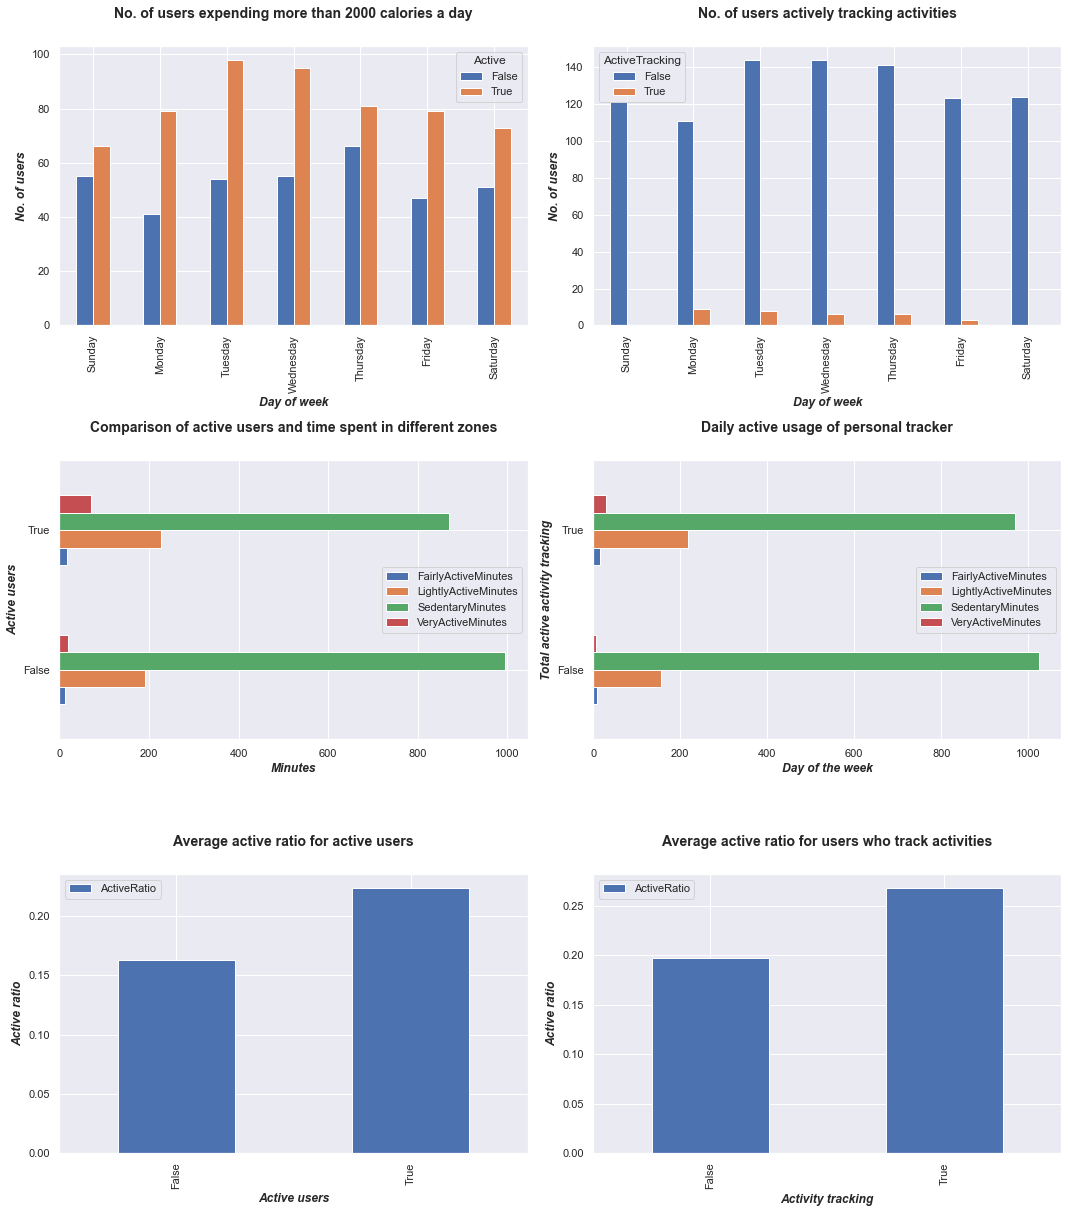

In [35]:
# Plot pivot tables into charts
fig, axs = plt.subplots(3, 2, figsize=(15, 17))

pivot_1.plot(kind='barh', ax=axs[1,1])
axs[1,1].set_title('Daily active usage of personal tracker', fontweight='bold', fontsize = 14, y=1.08)
axs[1,1].set_xlabel('Day of the week', fontweight='bold', style = 'italic')
axs[1,1].set_ylabel('Total active activity tracking', fontweight='bold', style = 'italic')

pivot_2.plot(kind='barh', ax=axs[1,0])
axs[1,0].set_title('Comparison of active users and time spent in different zones', fontweight='bold', fontsize = 14, y=1.08)
axs[1,0].set_xlabel('Minutes', fontweight='bold', style = 'italic')
axs[1,0].set_ylabel('Active users', fontweight='bold', style = 'italic')

pivot_3.plot(kind='bar', ax=axs[0,1])
axs[0,1].set_title('No. of users actively tracking activities', fontweight='bold', fontsize = 14, y=1.08)
axs[0,1].set_xlabel('Day of week', fontweight='bold', style = 'italic')
axs[0,1].set_ylabel('No. of users', fontweight='bold', style = 'italic')

pivot_4.plot(kind='bar', ax=axs[0,0])
axs[0,0].set_title('No. of users expending more than 2000 calories a day', fontweight='bold', fontsize = 14, y=1.08)
axs[0,0].set_xlabel('Day of week', fontweight='bold', style = 'italic')
axs[0,0].set_ylabel('No. of users', fontweight='bold', style = 'italic')

pivot_5.plot(kind='bar', ax=axs[2,1])
axs[2,1].set_title('Average active ratio for users who track activities', fontweight='bold', fontsize = 14, y=1.08)
axs[2,1].set_xlabel('Activity tracking', fontweight='bold', style = 'italic')
axs[2,1].set_ylabel('Active ratio', fontweight='bold', style = 'italic')

pivot_6.plot(kind='bar', ax=axs[2,0])
axs[2,0].set_title('Average active ratio for active users', fontweight='bold', fontsize = 14, y=1.08)
axs[2,0].set_xlabel('Active users', fontweight='bold', style = 'italic')
axs[2,0].set_ylabel('Active ratio', fontweight='bold', style = 'italic')

fig.tight_layout()

In [36]:
pivot_7 = df3_s[['TotalMinutesAsleep','SedentaryMinutes']] 
pivot_8 = df3_s[['TotalMinutesAsleep','Activeratio']]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


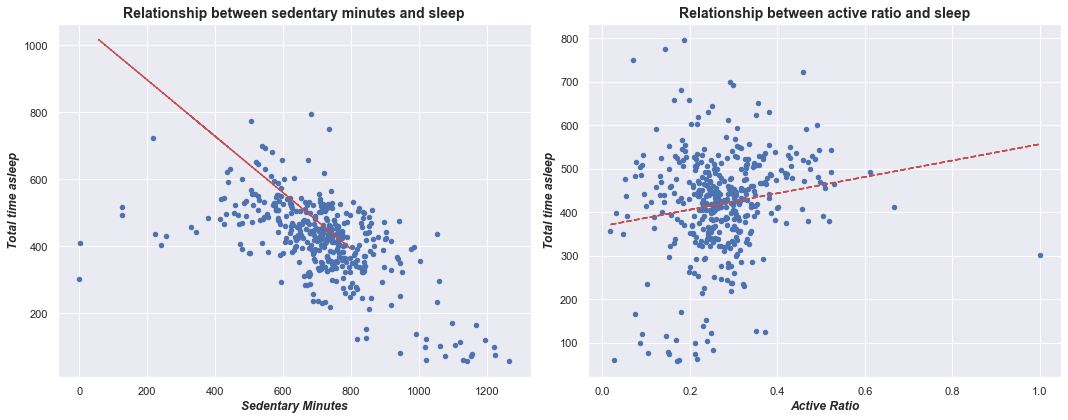

In [37]:
# Plot pivot tables into charts
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

pivot_7.plot(x='SedentaryMinutes', y='TotalMinutesAsleep', kind='scatter', ax=axs[0])
x = df3_s['TotalMinutesAsleep']
y = df3_s['SedentaryMinutes']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axs[0].plot(x, p(x), "r--")
axs[0].set_title('Relationship between sedentary minutes and sleep', fontweight='bold', fontsize = 14)
axs[0].set_xlabel('Sedentary Minutes', fontweight='bold', style = 'italic')
axs[0].set_ylabel('Total time asleep', fontweight='bold', style = 'italic')

pivot_8.plot(x='Activeratio', y='TotalMinutesAsleep', kind='scatter', ax=axs[1])
x = df3_s['Activeratio']
y = df3_s['TotalMinutesAsleep']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axs[1].plot(x, p(x), "r--")
axs[1].set_title('Relationship between active ratio and sleep', fontweight='bold', fontsize = 14)
axs[1].set_xlabel('Active Ratio', fontweight='bold', style = 'italic')
axs[1].set_ylabel('Total time asleep', fontweight='bold', style = 'italic')

fig.tight_layout()

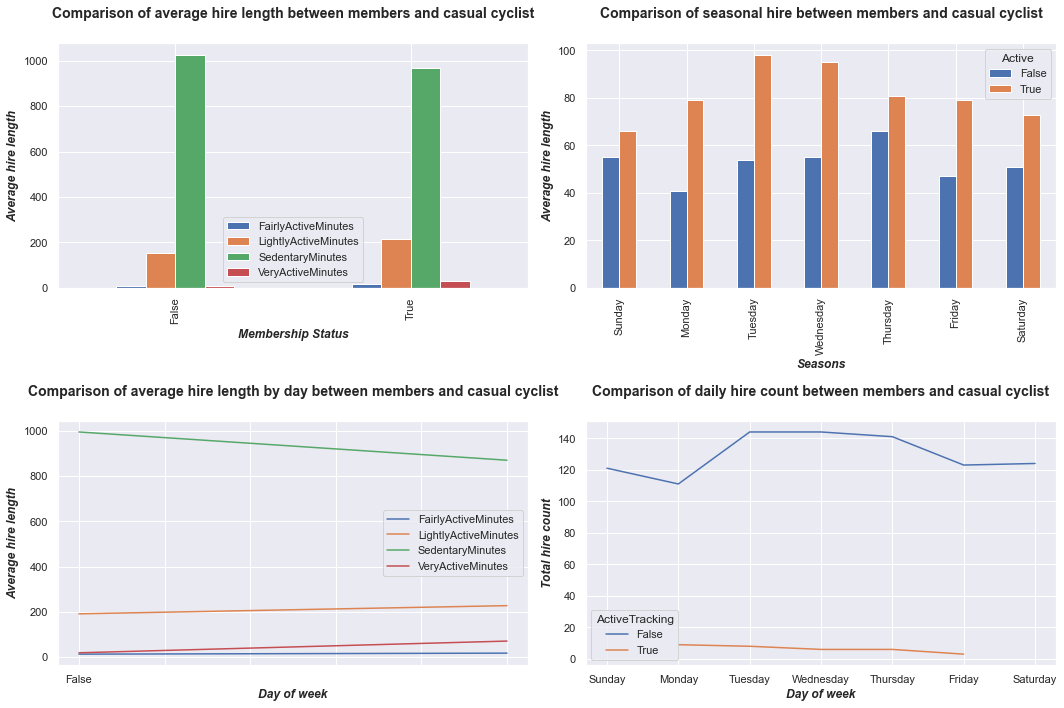

In [39]:
# Plot pivot tables into charts
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pivot_1.plot(kind='bar', ax=axs[0,0])
axs[0,0].set_title('Comparison of average hire length between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[0,0].set_xlabel('Membership Status', fontweight='bold', style = 'italic')
axs[0,0].set_ylabel('Average hire length', fontweight='bold', style = 'italic')

pivot_2.plot(kind='line', ax=axs[1,0])
axs[1,0].set_title('Comparison of average hire length by day between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[1,0].set_xlabel('Day of week', fontweight='bold', style = 'italic')
axs[1,0].set_ylabel('Average hire length', fontweight='bold', style = 'italic')

pivot_3.plot(kind='line', ax=axs[1,1])
axs[1,1].set_title('Comparison of daily hire count between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[1,1].set_xlabel('Day of week', fontweight='bold', style = 'italic')
axs[1,1].set_ylabel('Total hire count', fontweight='bold', style = 'italic')

pivot_4.plot(kind='bar', ax=axs[0,1])
axs[0,1].set_title('Comparison of seasonal hire between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[0,1].set_xlabel('Seasons', fontweight='bold', style = 'italic')
axs[0,1].set_ylabel('Average hire length', fontweight='bold', style = 'italic')

fig.tight_layout()

### 5.2 Summary from all analysis

From the initial observation, we can state the following:
* The average total distance tracked is about 5.5kms.
* The daily average energy expenditure by users was 2.3kcal.
* We also note that some users also included data when the device was not used (ie. removed from their wrist) as seen in the when checking the min value data point for sedentary minutes. 
* The total minutes asleep of users were 419 minutes, which is equivalent to approximately 7 hours. 

Observations from charts generated from daily data:
* The userbase are generally on the active side, burning more than 2kcal a day. Users then to have higher calorific outputs over the weekdays compared to weekends.
* Only a small group of users tracked actively tracked their workouts. This group tended to track their activities only on the weekdays. We also observe that the number of activities tracked tended to decrease throughout the week. 
* We observed that users who do not actively track workouts spent a higher ammount of time in the very active minutes category, compared to users who track their activities. Users who were deemed inactive spent more time in the sedentary minutes category. There was little difference in both groups in the lightly and fairly active minutes categories.
* Users who are in the active category have an average active ratio of 0.22, while users who track their activities have a ratio of 0.26. 

Observations from charts generated from sleep data:
* There is an observed trend where users who spent more time in the sedentary minutes category tended to have less sleeping minutes. 

* A higher active ratio contributed to longer sleeping period.

    
### 5.3 Discussion
As per our ROCCC analysis, we have to state that the data set is already biased towards users who had an active lifestyle and were already interested in fitness tracking. We also have to mentioned that the data set is not gender specific, so it might not fit the needs of Bellabeat who are targetting the female population.

We can draw a conclusion that a higher percentage of the current userbase is in the active category and are health conscious. 

We observe that only a small group of users tracked their workouts. We can make the assumption that most users tend to forget to start tracking their workouts, or simply did not know how to track, due to a large number of minutes spent in the very active minutes category. 

We can also conclude that the users tended to workout more over weekdays. 

Users who were more active throughout the day also tended to have longer sleep periods. 

### 5.4 Recommendations
We can recommend improvements made to the tracker itself to start tracking workouts without user input. On top of that, a improvement in user interface might simplify traking of activities, encouraging users to actively track their workouts that are not detected by the device. 

Sleep tracking should be included by default, as the data points without sleep data was small. It shows that users are interested in tracking their sleep, and wanting to improve their sleep quality. The device tracking their daily active ratio can be correlated to their sleep behaviours. 

As mentioned previously, more gender specific data will be required to perform a comprehensive analysis and will be able to provide a higher quality recommendation towards improvement of Bellabeat's devices. 

This concludes the case study for Bellabeats.